In [3]:
!pip install -q keras
from keras.datasets import boston_housing 

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean 
test_data /= std

In [0]:
from keras import models 
from keras import layers 

def build_model():
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model 

In [0]:
# k-fold validation 
import numpy as np 

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 500 
all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_targets, 
              validation_data=(val_data, val_targets),
             epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0


In [0]:
all_scores

[2.3099350527961655,
 3.3614242855865175,
 2.7945511671576169,
 2.6127450017645808]

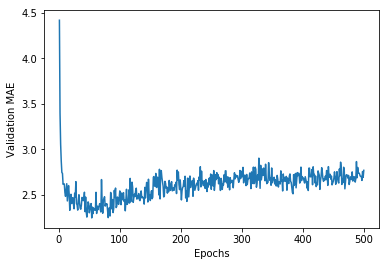

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
model = build_model() 
model.fit(train_data, train_targets, 
         epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 665us/step


In [0]:
test_mse_score

19.961270799823836

In [0]:
test_mae_score

2.7603955736347272